In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# A base de dados

A base de dados que vamos usar está em ``iris_2class``. Ela contempla características físicas de duas espécies de íris: *Iris virginica* e *Iris versicolor*. As características são: comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala. A base de dados está em um arquivo CSV, que pode ser lido com o Pandas.

In [2]:
df = pd.read_csv('./iris_2class.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


# Análise dos dados

Conhecer os dados é importante para projetar qualquer classificador. Esta análise serve para compreender a dificuldade do problema e possíveis métodos capazes de resolvê-lo.

Cada um dos elementos do conjunto de dados usado é caracterizado por cinco valores: a largura da sépala (cm), o comprimento da sépala (cm), a largura da pétala (cm), o comprimento da pétala e a espécie da planta (virginica ou versicolor). No caso do problema que estamos tentando resolver, a *espécie* é a característica de saída, enquanto os outros dados são características de entrada.

Uma análise inicial importante consiste no cálculo das estatísticas descritivas de cada característica, agrupando pela característica de saída (classe), neste caso, a *espécie* da planta:

In [3]:
df.groupby('especie').describe().T

especie                  versicolor  virginica
sepal length (cm) count   50.000000  50.000000
                  mean     5.936000   6.588000
                  std      0.516171   0.635880
                  min      4.900000   4.900000
                  25%      5.600000   6.225000
                  50%      5.900000   6.500000
                  75%      6.300000   6.900000
                  max      7.000000   7.900000
sepal width (cm)  count   50.000000  50.000000
                  mean     2.770000   2.974000
                  std      0.313798   0.322497
                  min      2.000000   2.200000
                  25%      2.525000   2.800000
                  50%      2.800000   3.000000
                  75%      3.000000   3.175000
                  max      3.400000   3.800000
petal length (cm) count   50.000000  50.000000
                  mean     4.260000   5.552000
                  std      0.469911   0.551895
                  min      3.000000   4.500000
                  25%      4.000000   5.100000
                  50%      4.350000   5.550000
                  75%      4.600000   5.875000
                  max      5.100000   6.900000
petal width (cm)  count   50.000000  50.000000
                  mean     1.326000   2.026000
                  std      0.197753   0.274650
                  min      1.000000   1.400000
                  25%      1.200000   1.800000
                  50%      1.300000   2.000000
                  75%      1.500000   2.300000
                  max      1.800000   2.500000

## Histograma

As características estudadas da sépala são variáveis contínuas. Para compreender melhor a distribuição de uma característica podemos usar um histograma, que discretiza a distribuição dos valores em "baldes". Cada "balde" representa um intervalo dos valores e possui a contagem dos valores que estão naquele intervalo. Cada "balde" é representado por um gráfico de barras.

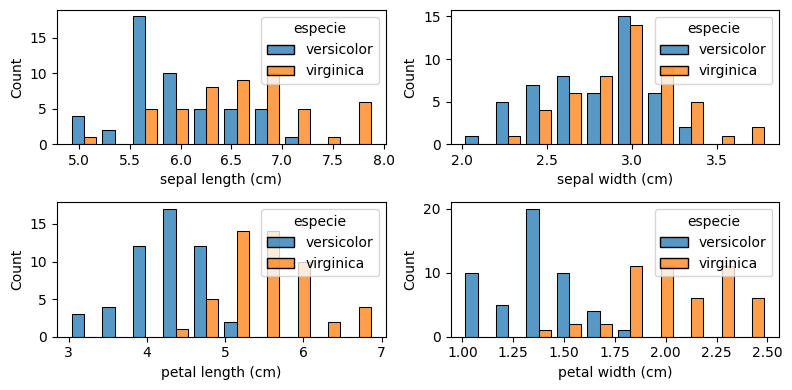

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,4))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0][0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[0][1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1][0])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1][1])
fig.tight_layout()
#plt.show()

A partir dos historigramas é possível dizer que os atributos que melhor funcionam para uma classificação são o comprimento da pétala e a largura da pétala. Isso porque as distribuições das classes são mais distintas nesses atributos.

## Scatterplot (gráfico de pontos)

Uma vez que selecionamos os atributos que melhor funcionam para a classificação, podemos plotar um gráfico de pontos para visualizar a distribuição dos dados. Cada ponto representa um elemento da base de dados. A cor do ponto representa a classe do elemento. O eixo X representa a largura da pétala e o eixo Y representa o comprimento da pétala.

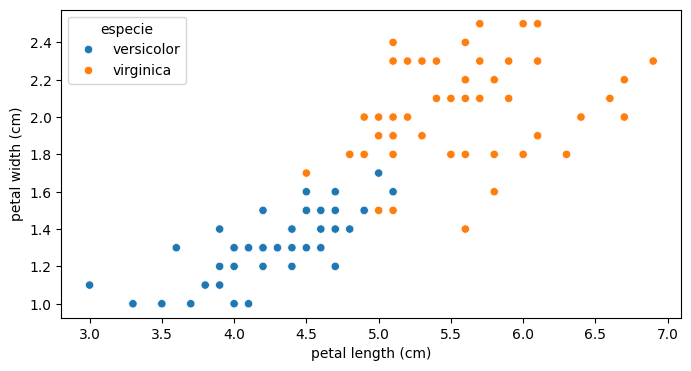

In [5]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.show()

Conforme esperado, podemos ver que as características selecionadas permitem separar bem as duas classes. Apesar de não separar perfeitamente as 2 classes, podemos ver que é possível separar os 2 conjuntos razoavelmente bem traçando uma reta em ``petal width (cm)=1,7``:

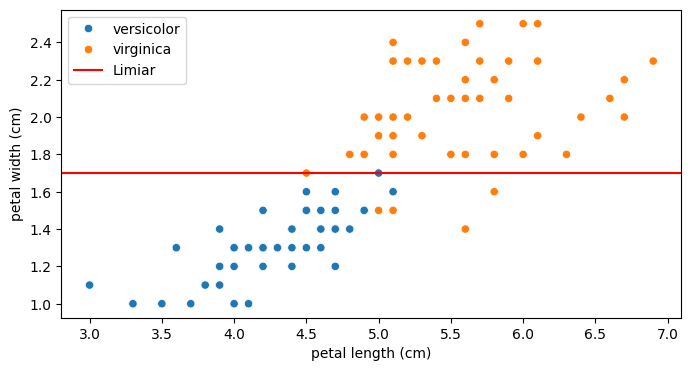

In [6]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.7, color='red', label='Limiar')
plt.legend()
plt.show()

# Aprendizado do limiar por busca exaustiva

O algoritmo de aprendizado mais simples realiza uma busca exaustiva pelos parâmetros que otimizem alguma métrica. Esta técnica se chama busca exaustiva, ou busca em grade (*grid-search*). No exemplo que estamos estudando, a busca exaustiva testa uma lista de todos os limiares possíveis dentro de um intervalo, e retorna o limiar que maximiza a métrica de desempenho (como a acurácia, por exemplo).

In [12]:
def classificador_limiar(limiar, atributo, dados, rotulos=None):
    predicoes = []
    for idx in range(len(dados)):
        if dados.iloc[idx][atributo] <= limiar:
            predicoes.append(rotulos[0])
        else:
            predicoes.append(rotulos[1])
    return pd.DataFrame(predicoes, columns=['especie'])

Melhor limiar: 1.600, Melhor Acurácia: 0.940


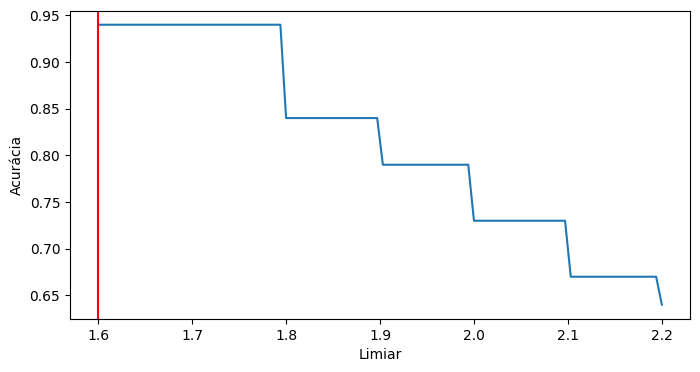

In [15]:
from sklearn.metrics import accuracy_score

n_limiares = 100
limiares = np.linspace(1.6, 2.2, n_limiares)
acuracias = []

melhor_limiar = limiares[0]
melhor_acuracia = 0

dados = df[['petal width (cm)', 'petal length (cm)']]

for limiar in limiares:
    predicoes = classificador_limiar(limiar, 'petal width (cm)', dados, ['versicolor', 'virginica'])

    acuracia = accuracy_score(df['especie'], predicoes['especie'])
    acuracias.append(acuracia)

    if acuracia > melhor_acuracia:
        melhor_acuracia = acuracia
        melhor_limiar = limiar

print("Melhor limiar: %.3f, Melhor Acurácia: %.3f" % (melhor_limiar, melhor_acuracia))

fig, axes = plt.subplots(figsize=(8,4))
axes.plot(limiares, acuracias)
axes.axvline(melhor_limiar, color='red')
axes.set_xlabel('Limiar')
axes.set_ylabel('Acurácia')
plt.show()

A busca exaustiva pode encontrar bons resultados, mas depende da realização da classificação muitas vezes. A quantidade de vezes aumenta proporcionalmente a quantidade de valores a serem avaliados. No exemplo, avaliamos ``n_limiares`` valores linearmente espaçados entre 1,6 e 2,2. Quanto maior ``n_limiares`` maior a probabilidade de encontrar a melhor solução possível (a solução ótima). Entretanto, o custo da busca aumenta proporcionalmente.

Esta abordagem na maioria das vezes não é viável, uma vez que os modelos usados na prática possuem muitos parâmetros que apenas um limiar. Com muitos parametros para otimizar em conjunto, o custo computacional aumenta exponencialmente, o que inviabiliza este método. O foco do nosso curso não é estudar os algoritmos de otimização, entretanto é importante compreender que existem técnicas mais eficientes para encontrar soluções que são viáveis, mas que nem sempre encontram a melhor solução possível.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df[["petal width (cm)", "petal length (cm)"]]
y = df[["especie"]]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=10)


In [10]:
def treinar_classificador_limiar(n_limiares, atributo, rotulos, dados_X, dados_y):
    alt_max = np.max(dados_X[atributo])
    alt_min = np.min(dados_X[atributo])
    limiares = np.linspace(alt_min, alt_max, n_limiares)

    acuracias = []
    melhor_limiar = None
    melhor_acuracia = -1

    for limiar in limiares:
        predicoes = classificador_limiar(limiar, atributo, dados_X, rotulos)
        acuracia = accuracy_score(dados_y, predicoes['especie'])

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar

        acuracias.append(acuracia)

    return melhor_limiar, melhor_acuracia, acuracias

In [16]:
acuracias = []
n_iteracoes = 20

for i in range(n_iteracoes):
  X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=i)

  limiar, acc, _ = treinar_classificador_limiar(100, 'petal width (cm)', ["versicolor", "virginica"], X_treino, y_treino)

  predicoes = classificador_limiar(limiar, "petal width (cm)", X_teste, ["versicolor", "virginica"])

  acuracias.append(accuracy_score(y_teste['especie'], predicoes["especie"]))

In [17]:
med, desv = np.mean(acuracias), np.std(acuracias)
min, max = np.min(acuracias), np.max(acuracias)

print("Acurácia Média: %.2f +- %.2f (min: %.2f, max: %.2f)" % (med, desv, min, max))

Acurácia Média: 0.95 +- 0.03 (min: 0.85, max: 1.00)
